In [1]:
from utils_v1 import *


In [2]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential, TrainerEvidentialUEO
import src.trainer.evidential as evidential

from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric


In [3]:
from enum import Enum
UncertaintyMethod = Enum('Predictor', 'pred_var MI pred_entropy KL pred_entropy_single evidential')
uncertaintyMethod = "evidential"


In [4]:

config = {
	"training": False,
	"learning_rate": 1e-4, # 1e-3
	"weights": [0.1, 0.9, 0],
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 1,
	"Uncertainty": {
		"annealing_step": 10*375 # 1875, 10*375*10
	},
	"uncertainty_method": uncertaintyMethod,
	"evidence_function": evidential.relu_evidence,
#	"loss": evidential.loss_evidential_dice
}

# config["loss"] = config["loss"](config["weights"])
'''
if config["training"] == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if config["training"] == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
dates = [2018, 2019]
dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
	addPastDeforestationInput = config['addPastDeforestationInput'],
	borderBuffer = 2)	
# dates = [2019, 2020]
# dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	
# dataset = MTDeforestationTime()	
# [2016, 2017, 2018]

ic(dates)


if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerEvidential(
		dataset)
else:
	patchesHandler = PatchesHandler()

# exp = 170
# exp = 155
exp = 155 # relu
# exp = 171 # softsign
## exp = 173
exp = 191
exp = 189

# if config["training"] == True:
# trainer = TrainerEvidentialUEO(config, dataset, patchesHandler)
trainer = TrainerEvidential(config, dataset, patchesHandler)

trainer.defineExperiment(exp)


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| dates: [2018, 2019]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [5]:
exp

189

In [6]:
trainer.setExperimentPath()
trainer.createLogFolders()

In [7]:
# ic(type(dataset), exp, dataset.dates)


In [8]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [9]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [10]:

trainer.label_mask.dtype

dtype('uint8')

In [11]:

trainer.getLabelCurrentDeforestation()

In [12]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [13]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

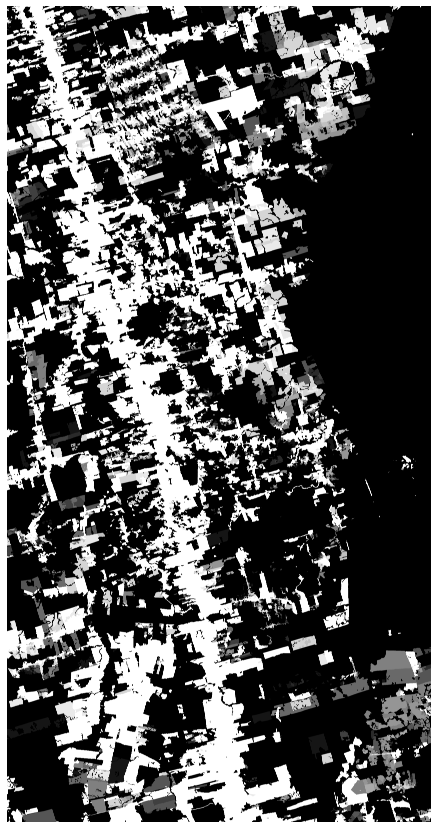

In [14]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [15]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [16]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [17]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [18]:
if config["training"] == True:
    trainer.extractCoords()

In [19]:
if config["training"] == True:
    trainer.trainTestSplit()

In [20]:
if config["training"] == True:
    trainer.label_mask.shape

In [21]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [22]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [23]:
if config["training"] == True:
    print(trainer.coords_train)

In [24]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [25]:
if config["training"] == True:
    inputSnipShow = True

In [26]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [27]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [28]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [29]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [30]:
if config["training"] == True:
    trainer.getGenerators()


In [31]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [32]:
if config["training"] == True:
    print(trainer.path_exp)

In [33]:
if config["training"] == True:
    print(trainer.channels)

In [34]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [35]:
# trainer.weights = [0.01, 0.99, 0]
trainer.weights

[0.1, 0.9, 0]

### Evidential metrics

In [36]:
if config["training"] == True:
    trainer.train()

In [37]:
if config["training"] == True:
    trainer.plotHistory()


In [38]:
if config["training"] == True:
    trainer.plotLossTerms()

In [39]:
if config["training"] == True:
    trainer.plotAnnealingCoef()

In [40]:
def draw_EDL_results(K, history):
    # train_acc1, train_ev_s, train_ev_f, test_acc1, test_ev_s, test_ev_f 
    # calculate uncertainty for training and testing data for correctly and misclassified samples
    '''
    K: known classes
    '''
    train_u_succ = K / (K+np.array(history['evidential_success']))
    train_u_fail = K / (K+np.array(history['evidential_fail']))
    test_u_succ  = K / (K+np.array(history['val_evidential_success']))
    test_u_fail  = K / (K+np.array(history['val_evidential_fail']))
    
    f, axs = plt.subplots(2, 2)
    f.set_size_inches([10,10])
    
    axs[0,0].plot(history['evidential_success'],c='r',marker='+')
    axs[0,0].plot(history['evidential_fail'],c='k',marker='x')
    axs[0,0].set_title('Train Data')
    axs[0,0].set_xlabel('Epoch')
    axs[0,0].set_ylabel('Estimated total evidence for classification') 
    axs[0,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[0,1].plot(train_u_succ,c='r',marker='+')
    axs[0,1].plot(train_u_fail,c='k',marker='x')
    axs[0,1].plot(history['acc'],c='blue',marker='*')
    axs[0,1].set_title('Train Data')
    axs[0,1].set_xlabel('Epoch')
    axs[0,1].set_ylabel('Estimated uncertainty for classification')
    axs[0,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    
    axs[1,0].plot(history['val_evidential_success'],c='r',marker='+')
    axs[1,0].plot(history['val_evidential_fail'],c='k',marker='x')
    axs[1,0].set_title('Test Data')
    axs[1,0].set_xlabel('Epoch')
    axs[1,0].set_ylabel('Estimated total evidence for classification') 
    axs[1,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[1,1].plot(test_u_succ,c='r',marker='+')
    axs[1,1].plot(test_u_fail,c='k',marker='x')
    axs[1,1].plot(history['val_acc'],c='blue',marker='*')
    axs[1,1].set_title('Test Data')
    axs[1,1].set_xlabel('Epoch')
    axs[1,1].set_ylabel('Estimated uncertainty for classification')
    axs[1,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    

In [41]:
if config["training"] == True:
    draw_EDL_results(trainer.class_n, trainer.history.history)

    plt.figure(5)
    plt.plot(trainer.history.history['evidential_success'],c='r',marker='+')
    plt.plot(trainer.history.history['evidential_fail'],c='k',marker='x')
    plt.title('Train Data')
    plt.xlabel('Epoch')
    plt.ylabel('Estimated total evidence for classification') 
    plt.legend(['Correct Clasifications','Misclasifications'])


In [42]:
trainer.image_stack.shape

(17730, 9200, 21)

In [43]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [44]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]

In [45]:
trainer.image_stack.shape

(17730, 9200, 21)

In [46]:
trainer.setPadding()

-30.0 -16.0


In [47]:
trainer.infer()

ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp189/models/resunet_0.h5'


time:  0


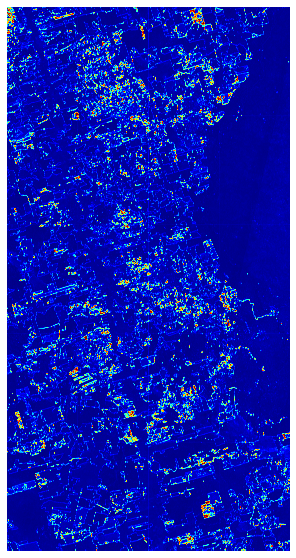

In [48]:
trainer.logger.plotFigure(trainer.u_reconstructed, 
            name='Uncertainty', cmap='jet', savefig=False, figsize=(10,10))

In [49]:
trainer.loadPredictedProbabilities()


In [50]:
trainer.prob_rec.shape

(17760, 9216)

In [51]:
trainer.getMeanProb()

In [52]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.0070174816
    np.mean(value): 0.040857617
    np.max(value): 0.9578302


In [53]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

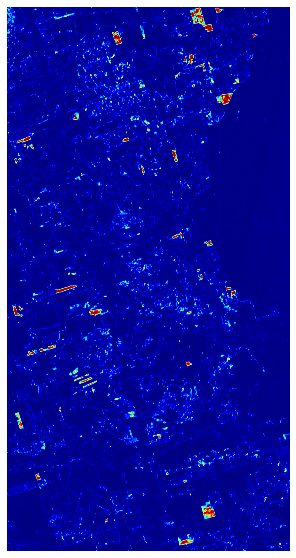

In [54]:
trainer.unpadMeanProb()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

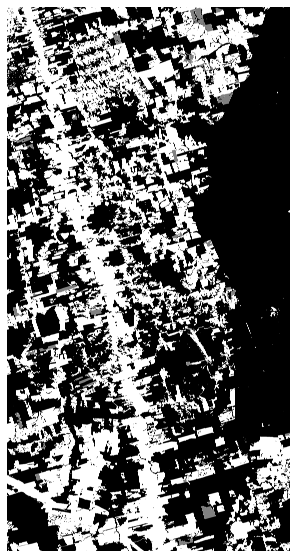

In [55]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [56]:
trainer.squeezeLabel()

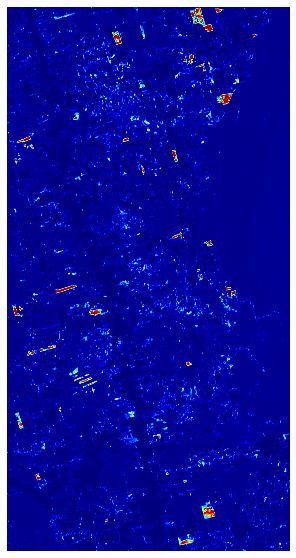

In [57]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [58]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.0
    np.mean(value): 0.030939939
    np.max(value): 0.9578302


In [59]:
print(trainer.label_mask.shape)

(17730, 9200)


In [60]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [61]:
trainer.getMAP()

87.31


In [62]:
trainer.prob_rec.shape

(17760, 9216)

In [63]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(17760, 9216, 1)


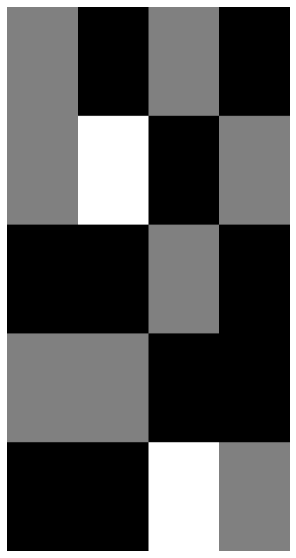

In [64]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [65]:
trainer.getLabelCurrentDeforestation()

In [66]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161632928,   1483072], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [67]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [68]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161632928,   1483072], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161759678,   1356322], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162989250,    126750], dtype=int64))


In [69]:
trainer.calculateMetrics()

ic| self.f1: 80.43, self.precision: 93.46, self.recall: 70.58


In [70]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9438185,)
ic| f1_val: 74.33
    precision_val: 85.16
    recall_val: 65.94
    mAP_val: 84.0


In [71]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [72]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162420866,    695134], dtype=int64))


In [73]:
'''

import types

trainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)
'''


'\n\nimport types\n\ntrainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)\n'

In [74]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


In [75]:
predicted_unpad_to_show = trainer.predicted_unpad.copy()

predicted_unpad_to_show[trainer.label_mask == 2] = 0
print(np.unique(predicted_unpad_to_show))

[0. 1.]


In [76]:
predicted_unpad_to_show.shape

(17730, 9200)

In [77]:

'''
trainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)
'''

'\ntrainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)\n'

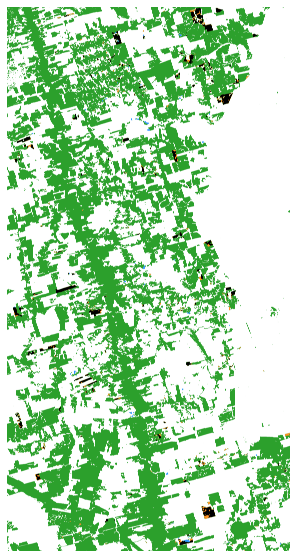

In [78]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [79]:
trainer.setUncertainty()

In [80]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54174403,)


In [81]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.072253264
    np.max(value): 1.0


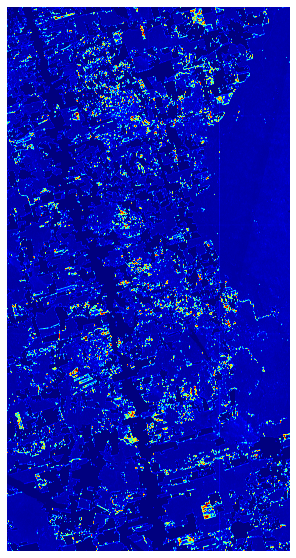

In [82]:
trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty evidential learning.png', figsize=(10,10), cmap='jet', savefig=True)

ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


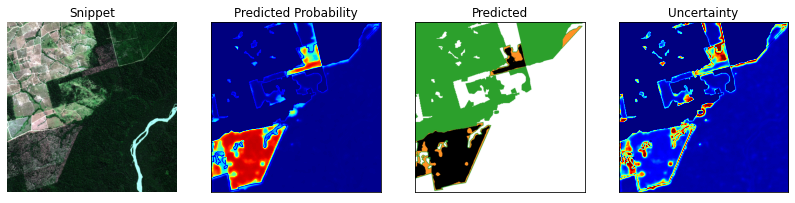

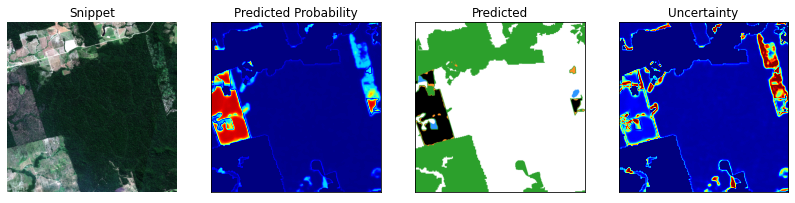

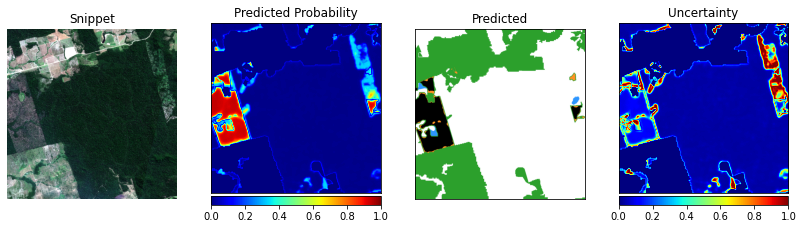

In [83]:
trainer.logger.plotCropSample(trainer)

In [84]:
trainer.logger.getStats(trainer.uncertainty)

ic| np.min(value): 0.021052444
    np.mean(value): 0.10525098
    np.max(value): 1.0


In [85]:
trainer.getOtherUncertaintyMetrics()
# import pdb
# pdb.set_trace()

(54174403,) (54174403,)


(0.2593384601120012, 0.09229092175405273)

In [86]:
print(trainer.sUEO)

print(trainer.ece_score)  

0.2593384601120012
0.09229092175405273


In [87]:
trainer.getUncertaintyMetrics()

(array([0, 1], dtype=int8), array([53608637,   565766], dtype=int64))
0.021052444 0.0958081 0.9999997
1.0 1.0 1.0
(53608637,) (53608637,)


ic| label_current_deforestation_test_classified_incorrect.shape: (565766,)
    predicted_test_classified_incorrect.shape: (565766,)
d:\Jorge\deforestation_uncertainty\src\trainer\evidential.py:603: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 565766
    len(self.label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 565766
    len(self.label_mask_current_deforestation_test): 54174403


cm_correct [[52899095    36434]
 [  152122   520986]]
cm_incorrect [[500745      0]
 [ 65021      0]]


In [88]:
trainer.m

{'precision_L': 0.934638154353988,
 'recall_L': 0.774000606143442,
 'recall_Ltotal': 0.7058197144401588,
 'AA': 0.010443419191901386,
 'precision_H': nan,
 'recall_H': 0.0,
 'f1_L': 0.8467682165704478,
 'f1_H': nan}

In [89]:
print(trainer.uncertainty.shape, trainer.predicted_test.shape)
print(trainer.uncertainty.dtype, trainer.predicted_test.dtype)
print(np.unique(trainer.predicted_test))
print(trainer.label_mask_current_deforestation_test.shape)


(54174403,) (54174403,)
float32 float32
[0. 1.]
(54174403,)


In [90]:
trainer.mean_prob[trainer.mask_amazon_ts == 1].shape

(81558000,)

In [91]:
uncertainty_test_correct = trainer.uncertainty[trainer.predicted_test == trainer.label_mask_current_deforestation_test]
uncertainty_test_incorrect = trainer.uncertainty[trainer.predicted_test != trainer.label_mask_current_deforestation_test]

predicted_test_correct = trainer.uncertainty[trainer.predicted_test == trainer.label_mask_current_deforestation_test]
uncertainty_test_incorrect = trainer.uncertainty[trainer.predicted_test != trainer.label_mask_current_deforestation_test]


In [92]:
print(np.min(uncertainty_test_correct), np.mean(uncertainty_test_correct), np.max(uncertainty_test_correct))
print(np.min(uncertainty_test_incorrect), np.mean(uncertainty_test_incorrect), np.max(uncertainty_test_incorrect))


0.021052444 0.10201502 1.0
0.04328925 0.79339755 1.0


In [93]:
trainer.alpha_reconstructed.shape

(17760, 9216, 3)

In [94]:
trainer.alpha_unpad = trainer.alpha_reconstructed[:trainer.label_mask.shape[0], :trainer.label_mask.shape[1]]

In [95]:
trainer.alpha_unpad.shape

(17730, 9200, 3)

In [96]:
print(np.min(trainer.alpha_unpad), np.mean(trainer.alpha_unpad), np.max(trainer.alpha_unpad))

1.0 18.81746 140.50127


In [97]:
trainer.predicted_unpad.shape

(17730, 9200)

In [98]:
trainer.label_mask.shape

(17730, 9200)

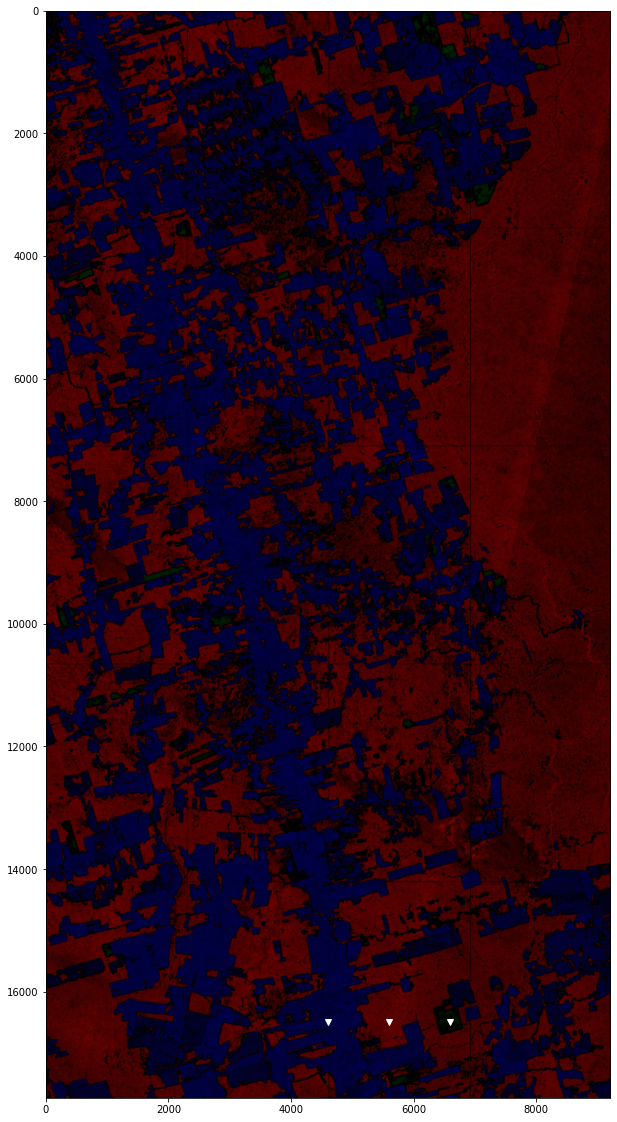

In [99]:
fig = plt.figure(figsize=(20,20))

plt.imshow(trainer.alpha_unpad.astype(np.uint8))
plt.plot(6600, 16500, marker='v', color="white")
plt.plot(5600, 16500, marker='v', color="white")
plt.plot(4600, 16500, marker='v', color="white")

In [100]:
[2200, 3200, 6900, 7900]

[2200, 3200, 6900, 7900]

In [101]:
row, col = (16500, 5600)
row, col = (16500, 6600)
row, col = (16500, 4600)


2
0.0


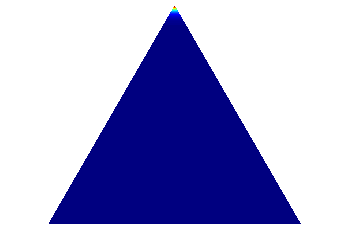

In [102]:
# trainer.predicted_unpad[2500, 7300]

# trainer.predicted_unpad[16500, 6600]
# trainer.predicted_unpad[16500, 5600]

print(trainer.label_mask[row, col])
print(trainer.predicted_unpad[row, col])
trainer.getMassFcn(trainer.alpha_unpad[row, col])


In [103]:
# trainer.getMassFcn(trainer.alpha_reconstructed[2500,7300])
# trainer.getMassFcn(trainer.alpha_unpad[16500,6600])


In [104]:
trainer.m

{'precision_L': 0.934638154353988,
 'recall_L': 0.774000606143442,
 'recall_Ltotal': 0.7058197144401588,
 'AA': 0.010443419191901386,
 'precision_H': nan,
 'recall_H': 0.0,
 'f1_L': 0.8467682165704478,
 'f1_H': nan}

In [105]:
trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54174403,)
    self.label_mask_current_deforestation_test.shape: (54174403,)


[0.13, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
threshold 0.13
(47378971,) (47378971,)


ic| label_current_deforestation_test_classified_incorrect.shape: (6795432,)
    predicted_test_classified_incorrect.shape: (6795432,)


cm_correct [[47197815        0]
 [    6927   174229]]


ic| TP_H + FN_H + FP_H + TN_H: 6795432
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 6795432
    len(label_mask_current_deforestation_test): 54174403


cm_incorrect [[6202025   36434]
 [ 210216  346757]]
[1.         0.96176224 0.2360414  0.12543621 0.90491948 0.62257416
 0.03625948]
threshold 0.15
(47915830,) (47915830,)


ic| label_current_deforestation_test_classified_incorrect.shape: (6258573,)
    predicted_test_classified_incorrect.shape: (6258573,)


cm_correct [[47688782       12]
 [    7842   219194]]


ic| TP_H + FN_H + FP_H + TN_H: 6258573
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 6258573
    len(label_mask_current_deforestation_test): 54174403


cm_incorrect [[5711058   36422]
 [ 209301  301792]]
[0.99994526 0.96545922 0.29695893 0.11552639 0.89231079 0.59048353
 0.03921262]
threshold 0.2
(48792470,) (48792470,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5381933,)
    predicted_test_classified_incorrect.shape: (5381933,)


cm_correct [[48492143      899]
 [    9869   289559]]


ic| TP_H + FN_H + FP_H + TN_H: 5381933
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 5381933
    len(label_mask_current_deforestation_test): 54174403


cm_incorrect [[4907697   35535]
 [ 207274  231427]]
[0.99690489 0.96704049 0.3922878  0.09934457 0.86689117 0.52752786
 0.04502549]
threshold 0.225
(49108370,) (49108370,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5066033,)
    predicted_test_classified_incorrect.shape: (5066033,)


cm_correct [[48781546     2098]
 [   10713   314013]]


ic| TP_H + FN_H + FP_H + TN_H: 5066033
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 5066033
    len(label_mask_current_deforestation_test): 54174403


cm_incorrect [[4618294   34336]
 [ 206430  206973]]
[0.99336309 0.96700911 0.42541751 0.09351341 0.85770941 0.50065674
 0.04740567]
threshold 0.25
(49382673,) (49382673,)


ic| label_current_deforestation_test_classified_incorrect.shape: (4791730,)
    predicted_test_classified_incorrect.shape: (4791730,)


cm_correct [[49033332     3241]
 [   11518   334582]]


ic| TP_H + FN_H + FP_H + TN_H: 4791730
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 4791730
    len(label_mask_current_deforestation_test): 54174403


cm_incorrect [[4366508   33193]
 [ 205625  186404]]
[0.99040622 0.9667206  0.45328391 0.08845007 0.84884584 0.47548523
 0.04968658]
threshold 0.27
(49581066,) (49581066,)


ic| label_current_deforestation_test_classified_incorrect.shape: (4593337,)
    predicted_test_classified_incorrect.shape: (4593337,)


cm_correct [[49215550     4512]
 [   12108   348896]]


ic| TP_H + FN_H + FP_H + TN_H: 4593337
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 4593337
    len(label_mask_current_deforestation_test): 54174403


cm_incorrect [[4184290   31922]
 [ 205035  172090]]
[0.98723289 0.96646021 0.47267619 0.08478796 0.84352881 0.45632085
 0.05140113]
threshold 0.3
(49851702,) (49851702,)


ic| label_current_deforestation_test_classified_incorrect.shape: (4322701,)
    predicted_test_classified_incorrect.shape: (4322701,)


cm_correct [[49464997     6206]
 [   13033   367466]]


ic| TP_H + FN_H + FP_H + TN_H: 4322701
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 4322701
    len(label_mask_current_deforestation_test): 54174403


cm_incorrect [[3934843   30228]
 [ 204110  153520]]
[0.98339185 0.96574761 0.49783439 0.07979231 0.83549209 0.42927048
 0.05397081]
threshold 0.34
(50172646,) (50172646,)


ic| label_current_deforestation_test_classified_incorrect.shape: (4001757,)
    predicted_test_classified_incorrect.shape: (4001757,)


cm_correct [[49760997     8733]
 [   14143   388773]]


ic| TP_H + FN_H + FP_H + TN_H: 4001757
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 4001757
    len(label_mask_current_deforestation_test): 54174403


cm_incorrect [[3638843   27701]
 [ 203000  132213]]
[0.97803052 0.96489839 0.52670062 0.07386804 0.82677564 0.39441489
 0.05732225]
threshold 0.36
(50320173,) (50320173,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3854230,)
    predicted_test_classified_incorrect.shape: (3854230,)


cm_correct [[49897033     9984]
 [   14773   398383]]


ic| TP_H + FN_H + FP_H + TN_H: 3854230
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 3854230
    len(label_mask_current_deforestation_test): 54174403


cm_incorrect [[3502807   26450]
 [ 202370  122603]]
[0.9755514  0.96424353 0.53972002 0.07114485 0.82254634 0.37727134
 0.05898963]
threshold 0.45
(50876007,) (50876007,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3298396,)
    predicted_test_classified_incorrect.shape: (3298396,)


cm_correct [[50406871    16147]
 [   17534   435455]]


ic| TP_H + FN_H + FP_H + TN_H: 3298396
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 3298396
    len(label_mask_current_deforestation_test): 54174403


cm_incorrect [[2992969   20287]
 [ 199609   85531]]
[0.96424507 0.96129266 0.58994431 0.06088477 0.80828403 0.29996142
 0.06599367]
threshold 0.55
(51364329,) (51364329,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2810074,)
    predicted_test_classified_incorrect.shape: (2810074,)


cm_correct [[50853305    23262]
 [   20286   467476]]


ic| TP_H + FN_H + FP_H + TN_H: 2810074
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 2810074
    len(label_mask_current_deforestation_test): 54174403


cm_incorrect [[2546535   13172]
 [ 196857   53510]]
[0.95259792 0.95841004 0.63332561 0.05187088 0.80246543 0.21372625
 0.07360085]
threshold 0.65
(51799982,) (51799982,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2374421,)
    predicted_test_classified_incorrect.shape: (2374421,)


cm_correct [[51252960    29644]
 [   23170   494208]]


ic| TP_H + FN_H + FP_H + TN_H: 2374421
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 2374421
    len(label_mask_current_deforestation_test): 54174403


cm_incorrect [[2146880    6790]
 [ 193973   26778]]
[0.9434115  0.9552165  0.6695415  0.0438292  0.79772402 0.12130409
 0.08271263]
threshold 0.8
(52513943,) (52513943,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1660460,)
    predicted_test_classified_incorrect.shape: (1660460,)


cm_correct [[51905981    36434]
 [   50542   520986]]
cm_incorrect [[1493859       0]
 [ 166601       0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1660460
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 1660460
    len(label_mask_current_deforestation_test): 54174403


[0.93463815 0.91156689 0.70581971 0.03065027        nan 0.
 0.09534026]


In [106]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54174403,)
    self.label_mask_current_deforestation_test.shape: (54174403,)


threshold 0.13
(54174403,) (54174403,)
cm_audited [[53436274        0]
 [    6927   731202]]
[1.         0.99061546]
threshold 0.15
(54174403,) (54174403,)
cm_audited [[53436262       12]
 [    7842   730287]]
[0.99998357 0.98937584]
threshold 0.2
(54174403,) (54174403,)
cm_audited [[53435375      899]
 [    9869   728260]]
[0.99876707 0.98662971]
threshold 0.225
(54174403,) (54174403,)
cm_audited [[53434176     2098]
 [   10713   727416]]
[0.99712411 0.98548628]
threshold 0.25
(54174403,) (54174403,)
cm_audited [[53433033     3241]
 [   11518   726611]]
[0.99555937 0.98439568]
threshold 0.27
(54174403,) (54174403,)
cm_audited [[53431762     4512]
 [   12108   726021]]
[0.99382369 0.98359636]
threshold 0.3
(54174403,) (54174403,)
cm_audited [[53430068     6206]
 [   13033   725096]]
[0.99151377 0.98234319]
threshold 0.34
(54174403,) (54174403,)
cm_audited [[53427541     8733]
 [   14143   723986]]
[0.98808138 0.98083939]
threshold 0.36
(54174403,) (54174403,)
cm_audited [[53426290     

ic| metric_values_audited: array([[1.        , 0.99061546],
                                  [0.99998357, 0.98937584],
                                  [0.99876707, 0.98662971],
                                  [0.99712411, 0.98548628],
                                  [0.99555937, 0.98439568],
                                  [0.99382369, 0.98359636],
                                  [0.99151377, 0.98234319],
                                  [0.98808138, 0.98083939],
                                  [0.98638558, 0.97998588],
                                  [0.97808324, 0.97624534],
                                  [0.96861174, 0.972517  ],
                                  [0.96018818, 0.96860982],
                                  [0.94967826, 0.93152687]])


cm_audited [[53399840    36434]
 [   50542   687587]]
[0.94967826 0.93152687]


In [107]:
trainer.setPlotLimsForUncertaintyAA()

In [108]:

def plotUncertaintyAA(self):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    ax1.plot(self.m['AA']*100, self.m['precision_L']*100, 'C3-', label="Precision Low Uncertainty")
    ax1.plot(self.m['AA']*100, self.m['recall_L']*100, 'C3--', label="Recall Low Uncertainty")
    ax1.plot(self.m['AA']*100, self.m['precision_H']*100, 'C0-', label="Precision High Uncertainty")
    ax1.plot(self.m['AA']*100, self.m['recall_H']*100, 'C0--', label="Recall High Uncertainty")
    ax1.plot(self.m['AA']*100, self.m_audited['precision']*100, 'C2-', label="Precision Audited")
    ax1.plot(self.m['AA']*100, self.m_audited['recall']*100, 'C2--', label="Recall Audited")

    ax1.legend(loc="lower right")
    ax1.set_ylabel('Precision/recall (%)')
    ax1.set_xlabel('Audit Area (%)')
    ax1.set_ylim(self.ylim)
    ax1.set_xlim(self.xlim)
    ax1.grid()

    xs = [0, 120]
    ax1.vlines(x = 3, ymin = 0, ymax = max(xs),
            colors = (0.2, 0.2, 0.2),
            label = 'vline_multiple - full height')

    ax2.plot(range(int(self.xlim[0]), int(self.xlim[1] + 2)), 
        np.ones(int(self.xlim[1] + 2)) * self.f1, 
        'C1:', label="F1 No Uncertainty")

    ax2.plot(self.m['AA']*100, self.m['f1_L']*100, 'C3-', label="F1 Low Uncertainty")
    ax2.plot(self.m['AA']*100, self.m['f1_H']*100, 'C0-', label="F1 High Uncertainty")
    ax2.plot(self.m['AA']*100, self.m_audited['f1']*100, 'C2-', label="F1 Audited")

    ax2.legend(loc="lower right")
    ax2.set_ylabel('F1 score (%)')
    ax2.set_xlabel('Audit Area (%)')
    ax2.set_ylim(self.ylim)
    ax2.set_xlim(self.xlim)

    ax2.grid()

    xs = [0, 120]
    ax2.vlines(x = 3, ymin = 0, ymax = max(xs),
            colors = (0.2, 0.2, 0.2),
            label = '3% AA')

    ax3.plot(np.asarray(self.threshold_list), self.m['AA']*100, label="AA")
    ax3.set_ylabel('Audit Area (%)')
    ax3.set_xlabel('Uncertainty Threshold')
    ax3.grid()
    ax3.set_ylim(self.xlim)

    self.xlim_adjusted = ax3.get_xlim()
    ax3.hlines(y = 3, xmin = self.xlim_adjusted[0], xmax = self.xlim_adjusted[1],
            colors = (0.2, 0.2, 0.2),
            label = '3% AA')

    ax3.set_xlim(self.xlim_adjusted)

    # if save_figures == True:
    if True:
        plt.savefig('output/figures/recall_precision_f1_AA.png', dpi=150, bbox_inches='tight')

def plotUEO(self): 

    plt.plot(self.m['AA']*100, self.m['UEO'], label="UEO") 
    plt.grid() 
    plt.xlabel('Audit Area (%)') 
    plt.ylabel('UEO (%)') 
    plt.xlim(self.xlim)
    plt.ylim([0, 0.4])

import types

trainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)
trainer.plotUEO = types.MethodType(plotUEO, trainer)


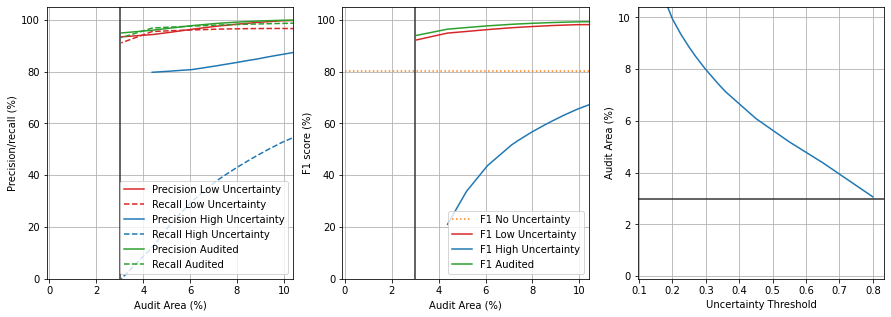

In [109]:
trainer.plotUncertaintyAA()

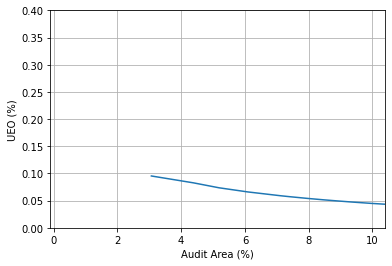

In [110]:
trainer.plotUEO()

In [111]:
trainer.getOptimalUncertaintyThreshold()

ic| bounds: (0.0015, 0.9985)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.38232011321635484
threshold 0.38232011321635484
(50475337,) (50475337,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3699066,)
    predicted_test_classified_incorrect.shape: (3699066,)


cm_correct [[50039802    11443]
 [   15520   408572]]


ic| TP_H + FN_H + FP_H + TN_H: 3699066
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 3699066
    len(label_mask_current_deforestation_test): 54174403


cm_incorrect [[3360038   24991]
 [ 201623  112414]]
[0.97275573 0.96340417 0.55352384 0.0682807  0.81812161 0.35796419
 0.06081917]
0.6176798867836452
threshold 0.6176798867836452
(51661267,) (51661267,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2513136,)
    predicted_test_classified_incorrect.shape: (2513136,)


cm_correct [[51125519    27617]
 [   22225   485906]]


ic| TP_H + FN_H + FP_H + TN_H: 2513136
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 2513136
    len(label_mask_current_deforestation_test): 54174403


cm_incorrect [[2274321    8817]
 [ 194918   35080]]
[0.94622052 0.95626128 0.65829415 0.04638973 0.79914345 0.15252307
 0.07949151]
0.7631402264327096
threshold 0.7631402264327096
(52310442,) (52310442,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1863961,)
    predicted_test_classified_incorrect.shape: (1863961,)


cm_correct [[51720822    36434]
 [   32200   520986]]
cm_incorrect [[1679018       0]
 [ 184943       0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1863961
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 1863961
    len(label_mask_current_deforestation_test): 54174403


[0.93463815 0.94179173 0.70581971 0.03440667        nan 0.
 0.09569672]
0.8530396603509355
threshold 0.8530396603509355
(52836037,) (52836037,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1338366,)
    predicted_test_classified_incorrect.shape: (1338366,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1338366
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 1338366
    len(label_mask_current_deforestation_test): 54174403


cm_correct [[52199673    36434]
 [   78944   520986]]
cm_incorrect [[1200167       0]
 [ 138199       0]]
[0.93463815 0.86841131 0.70581971 0.02470477        nan 0.
 0.09506419]
0.7954833215515112
threshold 0.7954833215515112
(52487683,) (52487683,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1686720,)
    predicted_test_classified_incorrect.shape: (1686720,)


cm_correct [[51882045    36434]
 [   48218   520986]]
cm_incorrect [[1517795       0]
 [ 168925       0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1686720
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 1686720
    len(label_mask_current_deforestation_test): 54174403


[0.93463815 0.91528872 0.70581971 0.031135          nan 0.
 0.09536393]
0.805528313192575
threshold 0.805528313192575
(52546443,) (52546443,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1627960,)
    predicted_test_classified_incorrect.shape: (1627960,)


cm_correct [[51935533    36434]
 [   53490   520986]]
cm_incorrect [[1464307       0]
 [ 163653       0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1627960
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 1627960
    len(label_mask_current_deforestation_test): 54174403


[0.93463815 0.90688906 0.70581971 0.03005035        nan 0.
 0.09526429]
0.823676032955773
threshold 0.823676032955773
(52655411,) (52655411,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1518992,)
    predicted_test_classified_incorrect.shape: (1518992,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H 

cm_correct [[52034517    36434]
 [   63474   520986]]
cm_incorrect [[1365323       0]
 [ 153669       0]]


+ FP_H + TN_H: 1518992
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 1518992
    len(label_mask_current_deforestation_test): 54174403


[0.93463815 0.89139719 0.70581971 0.02803892        nan 0.
 0.09492186]
0.807642948435755
threshold 0.807642948435755
(52559269,) (52559269,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1615134,)
    predicted_test_classified_incorrect.shape: (1615134,)


cm_correct [[51947095    36434]
 [   54754   520986]]
cm_incorrect [[1452745       0]
 [ 162389       0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1615134
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 1615134
    len(label_mask_current_deforestation_test): 54174403


[0.93463815 0.90489804 0.70581971 0.0298136         nan 0.
 0.09516902]
0.8043156692212334
threshold 0.8043156692212334
(52539256,) (52539256,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1635147,)
    predicted_test_classified_incorrect.shape: (1635147,)


cm_correct [[51928992    36434]
 [   52844   520986]]
cm_incorrect [[1470848       0]
 [ 164299       0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1635147
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 1635147
    len(label_mask_current_deforestation_test): 54174403


[0.93463815 0.90791001 0.70581971 0.03018302        nan 0.
 0.09527756]
0.8059695776742937
threshold 0.8059695776742937
(52549149,) (52549149,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625254,)
    predicted_test_classified_incorrect.shape: (1625254,)


cm_correct [[51937988    36434]
 [   53741   520986]]
cm_incorrect [[1461852       0]
 [ 163402       0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1625254
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 1625254
    len(label_mask_current_deforestation_test): 54174403


[0.93463815 0.906493   0.70581971 0.0300004         nan 0.
 0.09525431]
0.8066087484293916
threshold 0.8066087484293916
(52553084,) (52553084,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1621319,)
    predicted_test_classified_incorrect.shape: (1621319,)


cm_correct [[51941537    36434]
 [   54127   520986]]
cm_incorrect [[1458303       0]
 [ 163016       0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1621319
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 1621319
    len(label_mask_current_deforestation_test): 54174403


[0.93463815 0.90588458 0.70581971 0.02992777        nan 0.
 0.0952263 ]
0.806020038283816
threshold 0.806020038283816
(52549439,) (52549439,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624964,)
    predicted_test_classified_incorrect.shape: (1624964,)


cm_correct [[51938253    36434]
 [   53766   520986]]
cm_incorrect [[1461587       0]
 [ 163377       0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1624964
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 1624964
    len(label_mask_current_deforestation_test): 54174403


[0.93463815 0.90645357 0.70581971 0.02999505        nan 0.
 0.09525445]
0.8058858736998168
threshold 0.8058858736998168
(52548666,) (52548666,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625737,)
    predicted_test_classified_incorrect.shape: (1625737,)


cm_correct [[51937543    36434]
 [   53703   520986]]
cm_incorrect [[1462297       0]
 [ 163440       0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1625737
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 1625737
    len(label_mask_current_deforestation_test): 54174403


[0.93463815 0.90655294 0.70581971 0.03000932        nan 0.
 0.09525175]
0.8059362323864996
threshold 0.8059362323864996
(52548945,) (52548945,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625458,)
    predicted_test_classified_incorrect.shape: (1625458,)


cm_correct [[51937796    36434]
 [   53729   520986]]
cm_incorrect [[1462044       0]
 [ 163414       0]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1625458
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 1625458
    len(label_mask_current_deforestation_test): 54174403
ic| self.threshold_optimal: 0.8059695776742937


[0.93463815 0.90651192 0.70581971 0.03000417        nan 0.
 0.09525064]


In [112]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.8059695776742937
(52549149,) (52549149,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625254,)
    predicted_test_classified_incorrect.shape: (1625254,)


cm_correct [[51937988    36434]
 [   53741   520986]]


d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 1625254
    len(label_mask_current_deforestation_test): 54174403
ic| TP_H + FN_H + FP_H + TN_H: 1625254
    len(label_mask_current_deforestation_test): 54174403


cm_incorrect [[1461852       0]
 [ 163402       0]]
[0.93463815 0.906493   0.70581971 0.0300004         nan 0.
 0.09525431]
threshold 0.8059695776742937
(54174403,) (54174403,)


ic| self.m_optimal: {'AA': array([0.0300004]),
                     'UEO': array([0.09525431]),
                     'f1': 80.43,
                     'f1_H': array([nan]),
                     'f1_L': array([0.92035045]),
                     'precision_H': array([nan]),
                     'precision_L': array([0.93463815]),
                     'recall_H': array([0.]),
                     'recall_L': array([0.906493]),
                     'recall_Ltotal': array([0.70581971])}
ic| self.m_audited_optimal: {'f1': array([0.93819189]),
                             'precision': array([0.94945493]),
                             'recall': array([0.92719294])}


cm_audited [[53399840    36434]
 [   53741   684388]]
[0.94945493 0.92719294]


{'metrics': {'precision_L': array([0.93463815]),
  'recall_L': array([0.906493]),
  'recall_Ltotal': array([0.70581971]),
  'AA': array([0.0300004]),
  'precision_H': array([nan]),
  'recall_H': array([0.]),
  'UEO': array([0.09525431]),
  'f1_L': array([0.92035045]),
  'f1_H': array([nan]),
  'f1': 80.43},
 'metrics_audited': {'precision': array([0.94945493]),
  'recall': array([0.92719294]),
  'f1': array([0.93819189])},
 'exp': 189}